In [1]:
import time
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from NN_Classification import NeuralNetworkClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
df = pd.DataFrame(
    data=mnist.data,
    columns=mnist.feature_names
)
df['class'] = mnist.target
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [4]:
encoder = OneHotEncoder(sparse_output=False)

y = encoder.fit_transform(df['class'].to_numpy().reshape(-1, 1))
y.shape

(70000, 10)

In [5]:
X = df.drop('class', axis=1).to_numpy()
X.shape

(70000, 784)

In [6]:
X = X.astype('float64') / 255

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    shuffle=True
)

In [8]:
model = NeuralNetworkClassifier(
    layer_dims=[X.shape[1], 1024, 512, 256, 64, 16, y.shape[1]],
    activations=['relu', 'relu', 'relu', 'relu', 'relu',  'softmax'],
    epoch=20,
    learning_rate=0.005,
    verbose=1
)

In [9]:
start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"\nTraining completed in {training_time:.2f} seconds.")

Using GPU
GPU Device Name: NVIDIA GeForce RTX 4060 Laptop GPU
                                                                                                    
Training completed in 84.84 seconds.


In [10]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

y_train_true = np.argmax(y_train, axis=1)
y_test_true = np.argmax(y_test, axis=1)

train_accuracy = accuracy_score(y_train_true, y_pred_train)
test_accuracy = accuracy_score(y_test_true, y_pred_test)

In [11]:
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9998095238095238
Test Accuracy: 0.9801714285714286


In [12]:
print("\nClassification Report (Test):")
print(classification_report(y_test_true, y_pred_test))


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1714
           1       0.99      0.99      0.99      1977
           2       0.97      0.99      0.98      1761
           3       0.98      0.97      0.97      1806
           4       0.97      0.98      0.98      1587
           5       0.97      0.98      0.97      1607
           6       0.99      0.99      0.99      1761
           7       0.99      0.97      0.98      1878
           8       0.97      0.97      0.97      1657
           9       0.98      0.97      0.97      1752

    accuracy                           0.98     17500
   macro avg       0.98      0.98      0.98     17500
weighted avg       0.98      0.98      0.98     17500



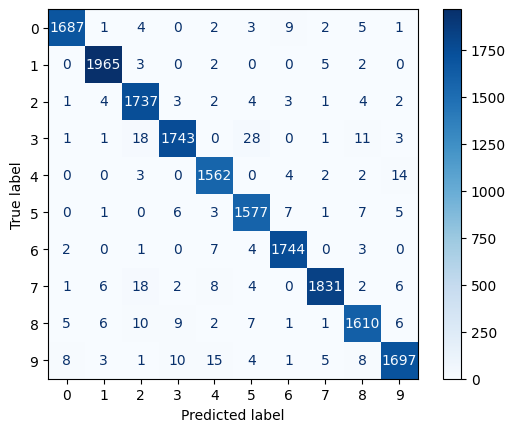

In [13]:
cm = confusion_matrix(y_test_true, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [14]:
with open("mnist_model.pkl", "wb") as f:
    pickle.dump(model, f)

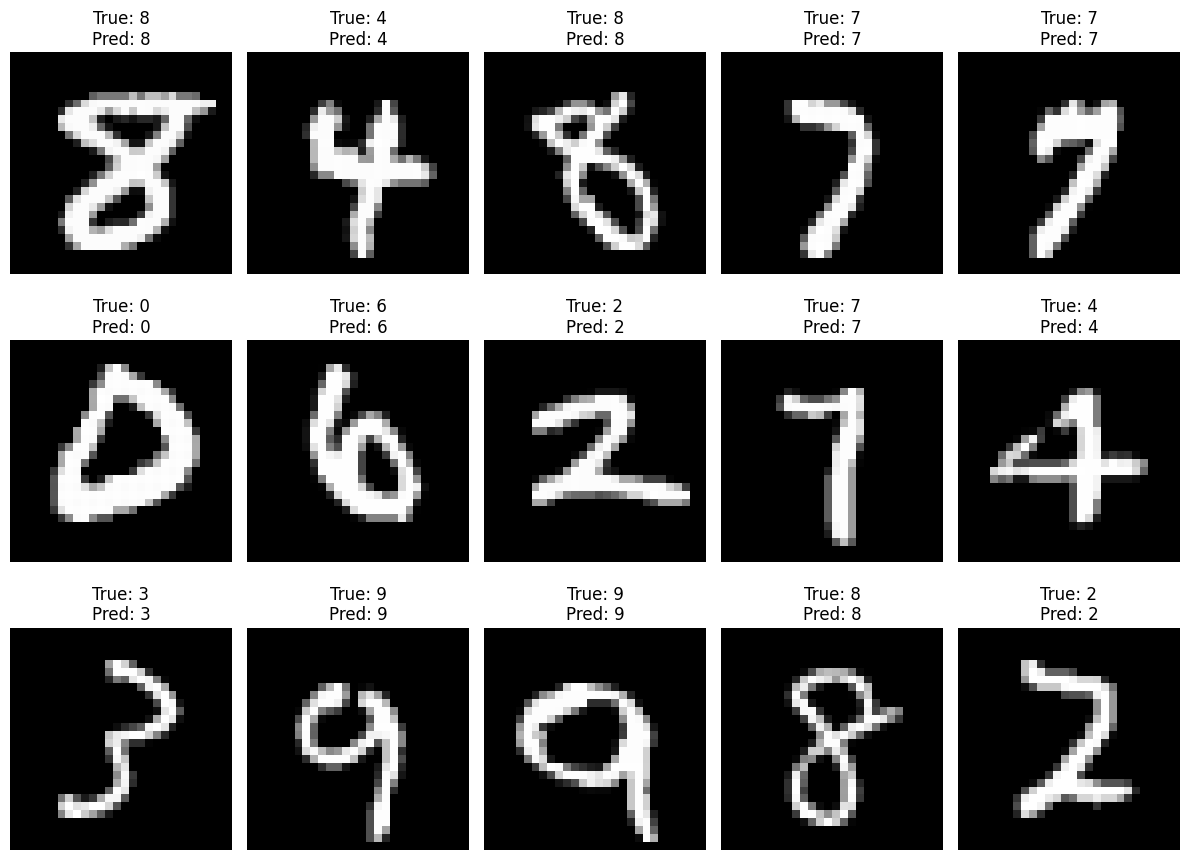

In [15]:
fig, axes = plt.subplots(3, 5, figsize=(12, 9))
axes = axes.flatten()
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {np.argmax(y_test[i])}\nPred: {y_pred_test[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

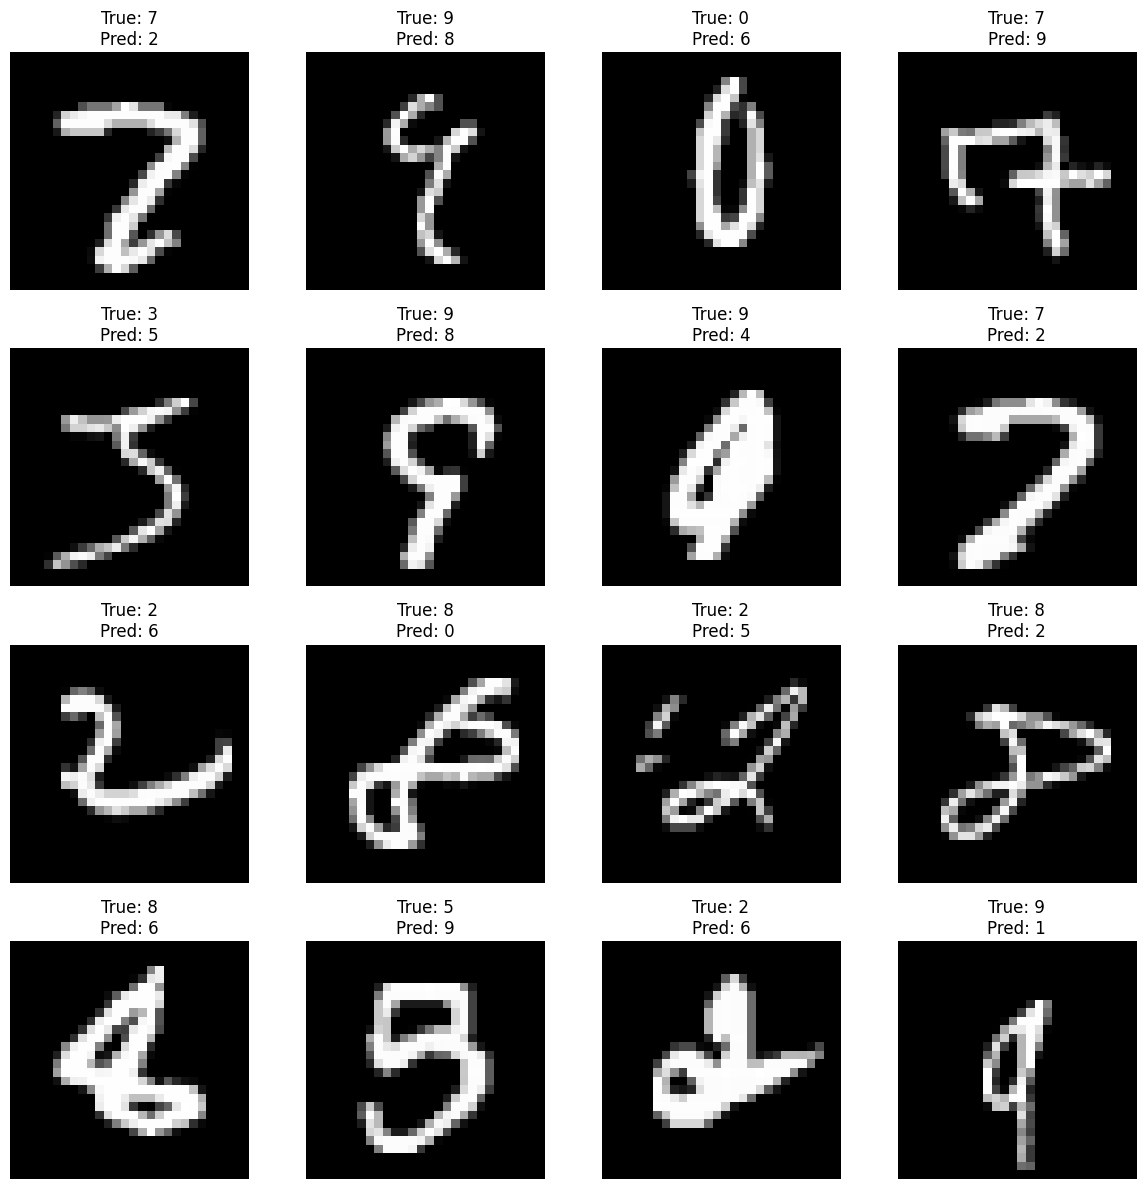

In [16]:
incorrect_indices = np.where(np.argmax(y_test, axis=1) != y_pred_test)[0]
if len(incorrect_indices) > 0:
    top16_indices = incorrect_indices[:16]
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    axes = axes.flatten()
    for i, idx in enumerate(top16_indices):
        ax = axes[i]
        # Directly index the NumPy array
        ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        ax.set_title(f"True: {np.argmax(y_test[idx])}\nPred: {y_pred_test[idx]}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No misclassified examples found!")